# Pandas visualization

### Import libraries

In [1]:
import pandas
from pandas_datareader import data

import matplotlib.pyplot as plt
%matplotlib inline

### Get all of the data for the Bitcoin cryptocurrency

In [2]:
# don't pass in the star/end dates to get all data
btc = data.DataReader(name = "BTC-USD", data_source = "yahoo")
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-17,1180.160034,1099.569946,1180.160034,1100.229980,7.065990e+08,1100.229980
2017-03-18,1114.069946,957.655029,1099.689941,973.817993,6.213020e+08,973.817993
2017-03-19,1069.910034,976.729980,976.729980,1036.739990,4.066480e+08,1036.739990
2017-03-20,1063.030029,1036.680054,1037.239990,1054.229980,2.865300e+08,1054.229980
2017-03-21,1122.430054,1055.359985,1055.359985,1120.540039,3.373910e+08,1120.540039
...,...,...,...,...,...,...
2022-03-12,39308.597656,38772.535156,38794.464844,38904.011719,1.461645e+10,38904.011719
2022-03-13,39209.351562,37728.144531,38884.726562,37849.664062,1.730075e+10,37849.664062
2022-03-14,39742.500000,37680.734375,37846.316406,39666.753906,2.432216e+10,39666.753906


The problem with the plot below is the size of the Volume data in proportion to the other values. You can only see the Volume data visualized in purple. So keep that in mind when plotting multiple columns.

<AxesSubplot:xlabel='Date'>

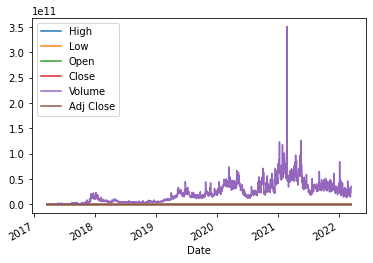

In [3]:
# visialize date from 2017-03-17 until today
btc.plot()

<AxesSubplot:xlabel='Date'>

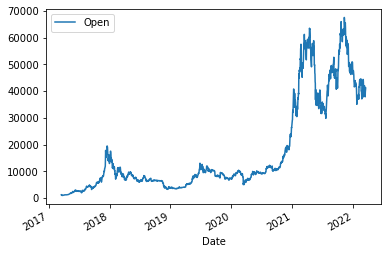

In [4]:
btc.plot(y = "Open")

<AxesSubplot:xlabel='Date'>

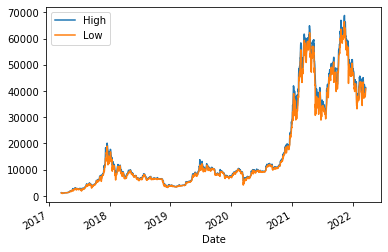

In [5]:
btc.plot(y = ["High", "Low"])

In [6]:
# zoom in for a closer look starting on 2022-01-01 to today
btc = data.DataReader(name = "BTC-USD", data_source = "yahoo", start = "2022-01-01")

<AxesSubplot:xlabel='Date'>

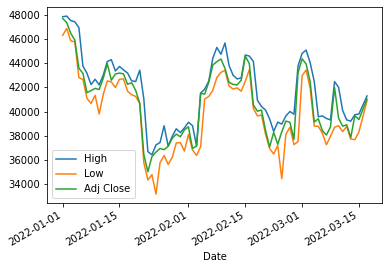

In [7]:
btc.plot(y = ["High", "Low", "Adj Close"])

### Plot one or more columns

<AxesSubplot:xlabel='Date'>

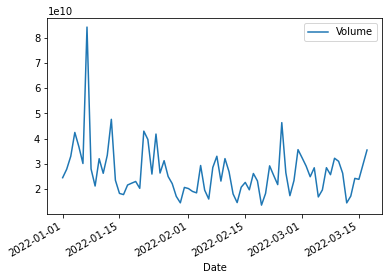

In [8]:
# this works, but there's another way
btc.plot(y = ["Volume"])

<AxesSubplot:xlabel='Date'>

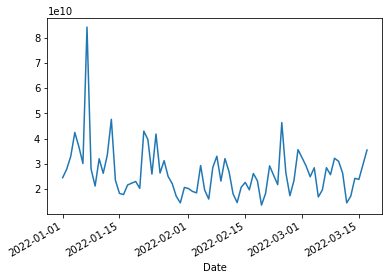

In [9]:
btc["Volume"].plot()

<AxesSubplot:xlabel='Date'>

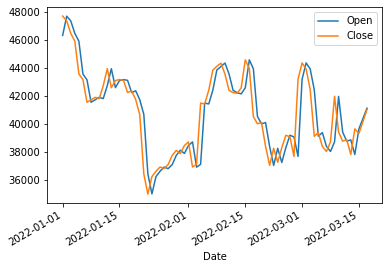

In [10]:
btc[["Open", "Close"]].plot()

### Create moving averages for 10, 20 and 50 day periods of time
A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the noise from random short-term price fluctuations. To learn more about the various types of moving averages, check out [this article on how to use a moving average to buy stock](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp). Again, I am not a financial adviser, and I am not offering financial advise. I am educational resources to explore data analysis from an educational context.

In [11]:
# A moving average is a calculation to analyze data points by creating a 
# series of averages of different subsets of the full data set. 
# It is also called a moving mean or rolling mean.
# Use .rolling() to perfor rolling window calculations.

# reset the data from all date ranges
sol = data.DataReader(name = "SOL-USD", data_source = "yahoo")

# set day periods
periods = [10,20,50]

# apply the rolling() function and create three columns with a rolling mean
for days in periods:
    column_name = "MA {} days".format(days)
    sol[column_name] = sol['Adj Close'].rolling(window = days, center = False).mean()

In [12]:
sol

,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2020-04-10,1.313487,0.694187,0.832005,0.951054,8.736428e+07,0.951054,NaN,NaN,NaN
2020-04-11,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.776819,NaN,NaN,NaN
2020-04-12,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.882507,NaN,NaN,NaN
2020-04-13,0.891603,0.773976,0.890760,0.777832,1.821128e+07,0.777832,NaN,NaN,NaN
2020-04-14,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.661925,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-12,82.663757,80.722099,80.747520,81.553818,1.036290e+09,81.553818,85.580000,88.328453,95.392279
2022-03-13,82.883034,78.004387,81.531219,78.936073,1.316843e+09,78.936073,83.919687,88.119098,95.087433
2022-03-14,82.099304,78.274353,78.925575,81.173340,1.676601e+09,81.173340,83.212423,87.854496,94.719335


<AxesSubplot:xlabel='Date'>

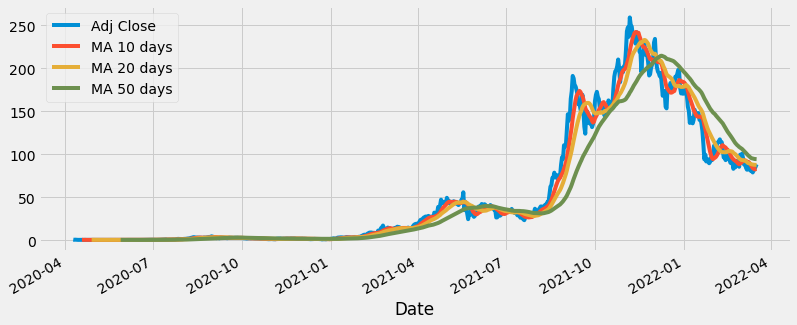

In [15]:
# plt.style.use("fivethirtyeight")
# Moving averages visualized
sol[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True,figsize=(12,5))